- Yahoo Finance 에서 주가 데이터 다운로드 (https://finance.yahoo.com/)
- 검색 후 Historical Data 선택
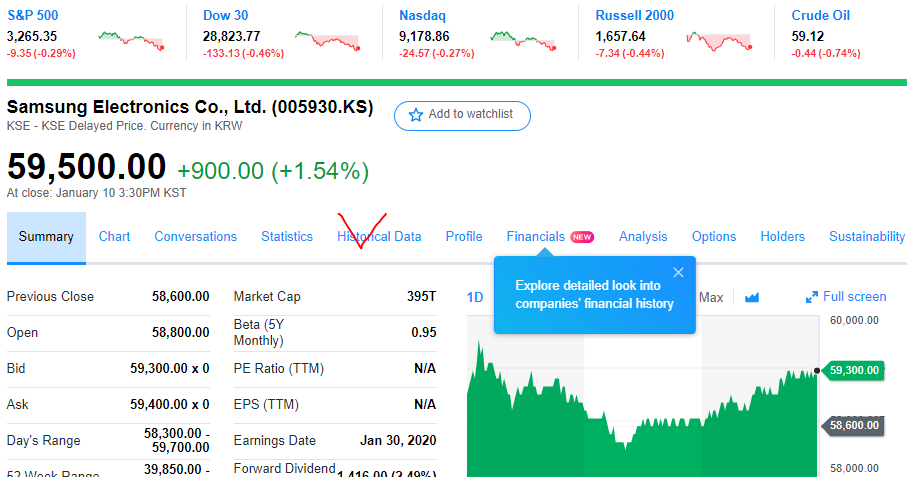

- 기간 선택 후 Download Data 클릭
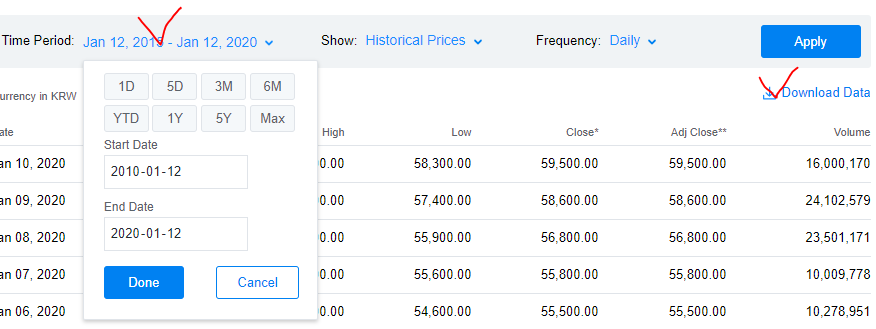

## Data Loading 및 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('005930.KS.csv')
df.shape

(5361, 7)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4379.354004,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4317.015625,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4496.240723,46880000.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5356,2021-04-23,81900.0,82900.0,81600.0,82800.0,82800.0,17805080.0
5357,2021-04-26,82900.0,83500.0,82600.0,83500.0,83500.0,15489938.0
5358,2021-04-27,83200.0,83300.0,82500.0,82900.0,82900.0,12941533.0
5359,2021-04-28,83200.0,83200.0,82100.0,82100.0,82100.0,15596759.0
5360,2021-04-29,82400.0,82500.0,81500.0,81700.0,81700.0,18710535.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5361 non-null   object 
 1   Open       5355 non-null   float64
 2   High       5355 non-null   float64
 3   Low        5355 non-null   float64
 4   Close      5355 non-null   float64
 5   Adj Close  5355 non-null   float64
 6   Volume     5355 non-null   float64
dtypes: float64(6), object(1)
memory usage: 293.3+ KB


In [6]:
df.loc[df['Open'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN


# 전처리
- date를 index
- 결측치 제거
- Adj Close 컬럼 제거
- MinMaxScaling

In [11]:
# date를 index로
# date: object => datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5361 non-null   datetime64[ns]
 1   Open       5355 non-null   float64       
 2   High       5355 non-null   float64       
 3   Low        5355 non-null   float64       
 4   Close      5355 non-null   float64       
 5   Adj Close  5355 non-null   float64       
 6   Volume     5355 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 293.3 KB


In [13]:
df.set_index('Date', inplace=True)

In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4379.354004,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4317.015625,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4496.240723,46880000.0


<AxesSubplot:xlabel='Date'>

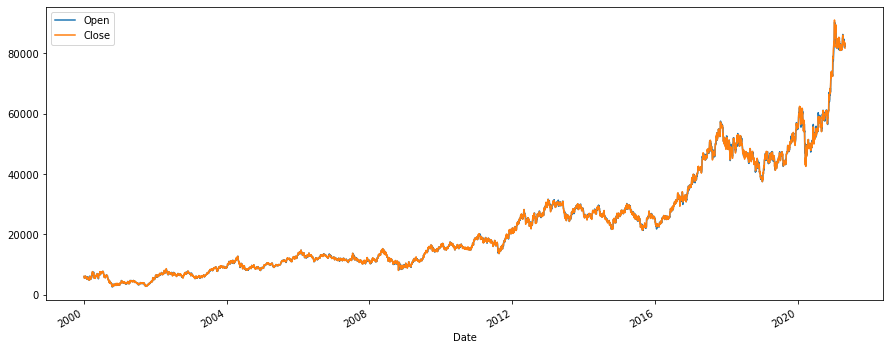

In [16]:
df[['Open', 'Close']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

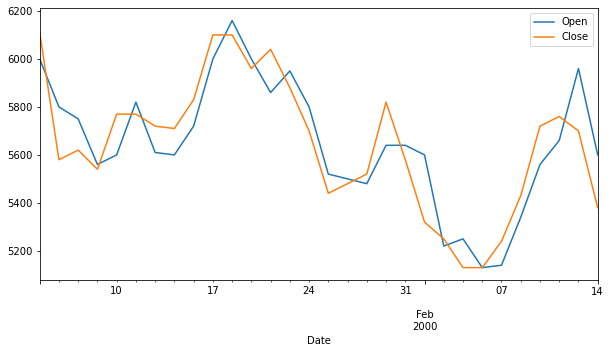

In [18]:
df[['Open', 'Close']].iloc[:30].plot(figsize=(10,5))

In [19]:
# 결측치 처리
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5355 entries, 2000-01-04 to 2021-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5355 non-null   float64
 1   High       5355 non-null   float64
 2   Low        5355 non-null   float64
 3   Close      5355 non-null   float64
 4   Adj Close  5355 non-null   float64
 5   Volume     5355 non-null   float64
dtypes: float64(6)
memory usage: 292.9 KB


In [21]:
# Adj Close 컬럼 제거
df.drop(columns=['Adj Close'], inplace=True)

In [22]:
df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000.0


### X, y 분리

In [23]:
df_y = df['Close'].to_frame()  #df['Close']: Series, Series.to_frame(): Series=>Dataframe(2차원)
df_X = df

### Scaling - MinMaxScaler
- Scaler를 X, y 용 따로 만든다.
    - y를 inverse 하기 위해

In [24]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(df_X)
y = y_scaler.fit_transform(df_y)

In [25]:
X[:3]

array([[0.03942571, 0.03562314, 0.03720717, 0.03829161, 0.45181622],
       [0.03714676, 0.03509145, 0.03559945, 0.0322873 , 0.45476966],
       [0.03657703, 0.03211399, 0.03628847, 0.03274046, 0.33121213]])

In [26]:
y_scaler.inverse_transform(y[:3])

array([[6110.],
       [5580.],
       [5620.]])

##  날짜 종가 예측
- X: 50일치 주가, y: 51일째 주가. 
    - 50일의 연속된 주식가격으로 51일째 주가를 예측한다.
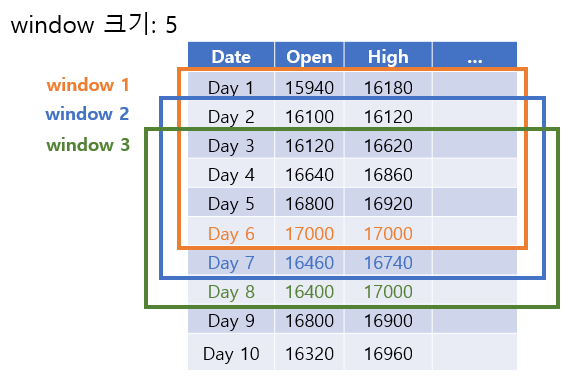     

X, y를 만든다.
각 index에 window size의 데이터셋이 들어가도록 한다.

In [28]:
window_size = 50  #한개 input값에 들어갈 연속된 값의 개수
data_X = []  #[[1-50], [2-51], [3-52], ...]
data_y = []  #[51, 52, 53, ...]

for i in range(0, len(y)-window_size):
    data_X.append(X[i:i+window_size])
    data_y.append(y[i+window_size])

In [29]:
np.shape(data_X)

(5305, 50, 5)

In [30]:
np.shape(data_y)

(5305, 1)

## Train, Test 분리

In [31]:
# train : test = 8 : 2
train_index = int(len(data_y)*0.8)
print(train_index)

4244


In [34]:
X_train, y_train = np.array(data_X[0:train_index]), np.array(data_y[0:train_index])
X_test, y_test = np.array(data_X[train_index:]), np.array(data_y[train_index:])

In [36]:
X_train.shape, X_test.shape

((4244, 50, 5), (1061, 50, 5))

## Model 생성
- LSTM 레이어는 return_sequences 인자에 따라 마지막 시퀀스에서 한 번만 출력할 수 있고 각 시퀀스에서 출력을 할 수 있다. 
    - return_sequences=True: 시퀀스마다 결과를 출력. False(기본값): 전체 Sequence를 처리하고 결과를 하나만 출력
- many to many 문제를 풀거나 LSTM 레이어를 여러개로 쌓아올릴 때는 return_sequence=True 옵션을 사용. 
- Dese에는 False로 해서 하나만 전달.
- 아래 그림에서 왼쪽은 return_sequences=False일 때, 오른쪽은 return_sequence=True일 때의 형상.

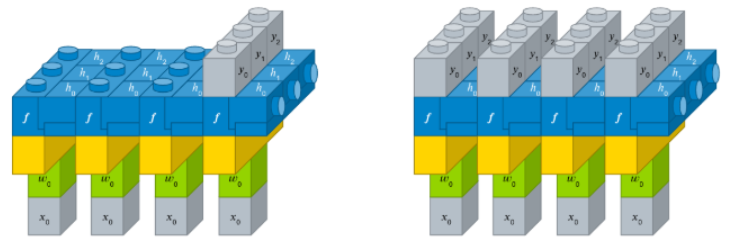

<center>[출처: https://tykimos.github.io/2017/04/09/RNN_Getting_Started]</center>

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 100
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]

In [39]:
# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(N_TRAIN)

In [41]:
print(train_dataset)

<ShuffleDataset shapes: ((50, 5), (1,)), types: (tf.float64, tf.float64)>


In [54]:
# 모델 구성
def create_model():
    model = keras.Sequential()
    model.add(layers.Input((window_size,5)))
    #LSTM
    model.add(layers.LSTM(32, activation='relu', return_sequences=False, input_shape=(window_size,5)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))  #회귀
    
    return model

In [55]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 32)                4864      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


In [58]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_dataset,
                    validation_steps=validation_steps)

ValueError: in converted code:

    C:\Users\Playdata\Anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py:677 map_fn
        batch_size=None)
    C:\Users\Playdata\Anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\keras\engine\training.py:2410 _standardize_tensors
        exception_prefix='input')
    C:\Users\Playdata\Anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\keras\engine\training_utils.py:573 standardize_input_data
        'with shape ' + str(data_shape))

    ValueError: Error when checking input: expected input_5 to have 3 dimensions, but got array with shape (50, 5)


In [ ]:
y_scaler.inverse_transform(np.array(loss).reshape(-1,1))

## 모델 학습, 평가

In [ ]:
# 평가
loss = model.evaluate(test_dataset)

## 예측

In [59]:
pred = model.predict(X_test)
pred_price = y_scaler.inverse_transform(pred)

NameError: name 'mpdel' is not defined

In [ ]:
pred_price[-3:]

In [ ]:
y_price = y_scaler.inverse_transform(y_test)

In [ ]:
# 실제값, 예측값을 그래프로 비교
plt.figure(figsize=(15,7))
plt.plot(y_price, label="Ground Truth")
plt.plot(pred_price, label="pred")
plt.legend()
plt.show()

In [ ]:
# 내일 주가

In [ ]:
|